C:\Users\User\AppData\Local\Temp\ipykernel_23160\2208279916.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  baris_data = row[0].split(';')
C:\Users\User\AppData\Local\Temp\ipykernel_23160\2208279916.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hasil_tes_counts.index, y=hasil_tes_counts.values, palette='viridis')


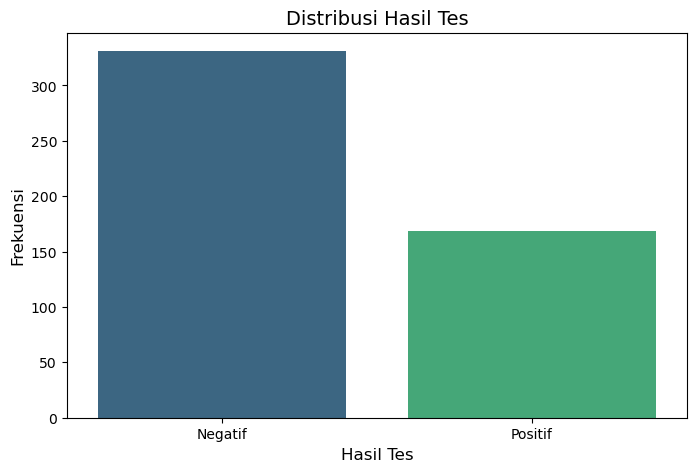


Probabilitas Menderita Penyakit jika Hasil Tes Positif: 0.48
Probabilitas Tidak Menderita Penyakit jika Hasil Tes Negatif: 0.54


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi dan Load Data

# Path file CSV
file_path = "D:\\SDP 2\\data_pasien2.csv"

# Baca file CSV dan proses data
df = pd.read_csv(file_path, encoding='utf-8', header=0)
data_dipisahkan = []
for _, row in df.iterrows():
    baris_data = row[0].split(';')
    if len(baris_data) == 3:
        data_dipisahkan.append(dict(zip(['Pasien', 'Hasil_Tes', 'Menderita_Penyakit'], map(str.strip, baris_data))))
df = pd.DataFrame(data_dipisahkan)

# Visualisasi Distribusi Hasil Tes

# Hitung frekuensi hasil tes
hasil_tes_counts = df['Hasil_Tes'].value_counts()

# Visualisasikan
plt.figure(figsize=(8, 5))
sns.barplot(x=hasil_tes_counts.index, y=hasil_tes_counts.values, palette='viridis')
plt.title('Distribusi Hasil Tes', fontsize=14)
plt.xlabel('Hasil Tes', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

# Probabilitas dan Analisis

# Hitung probabilitas
total_pasien = len(df)
jumlah_positif = (df['Hasil_Tes'] == 'Positif').sum()
jumlah_ya = (df['Menderita_Penyakit'] == 'Ya').sum()
jumlah_positif_dan_ya = ((df['Hasil_Tes'] == 'Positif') & (df['Menderita_Penyakit'] == 'Ya')).sum()

prob_penyakit_given_positif = jumlah_positif_dan_ya / jumlah_positif if jumlah_positif > 0 else 0
prob_tidak_penyakit_given_negatif = ((df['Hasil_Tes'] == 'Negatif') & (df['Menderita_Penyakit'] == 'Tidak')).sum() / (total_pasien - jumlah_positif) if (total_pasien - jumlah_positif) > 0 else 0

print(f"\nProbabilitas Menderita Penyakit jika Hasil Tes Positif: {prob_penyakit_given_positif:.2f}")
print(f"Probabilitas Tidak Menderita Penyakit jika Hasil Tes Negatif: {prob_tidak_penyakit_given_negatif:.2f}")